In [1]:
options(device=pdf) # turn off flashy window on each block execution
options(repr.plot.width=7, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [4]:
tweets = read.csv('data/tweets.csv.xz', stringsAsFactors=F)

In [5]:
head(tweets)

,Tweet,Avg
1,"I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore",2
2,iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple,2
3,LOVE U @APPLE,1.8
4,"Thank you @apple, loving my new iPhone 5S!!!!! #apple #iphone5S pic.twitter.com/XmHJCU4pcb",1.8
5,.@apple has the best customer service. In and out with a new phone in under 10min!,1.8
6,@apple ear pods are AMAZING! Best sound from in-ear headphones I've ever had!,1.8


In [7]:
library(tm)

In [8]:
corpus = Corpus(VectorSource(tweets$Tweet))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords('english'))
dtm = DocumentTermMatrix(corpus)
allTweets = as.data.frame(as.matrix(dtm))

In [10]:
dim(allTweets)

[1] 1181 3780

In [11]:
library(wordcloud)

Loading required package: RColorBrewer


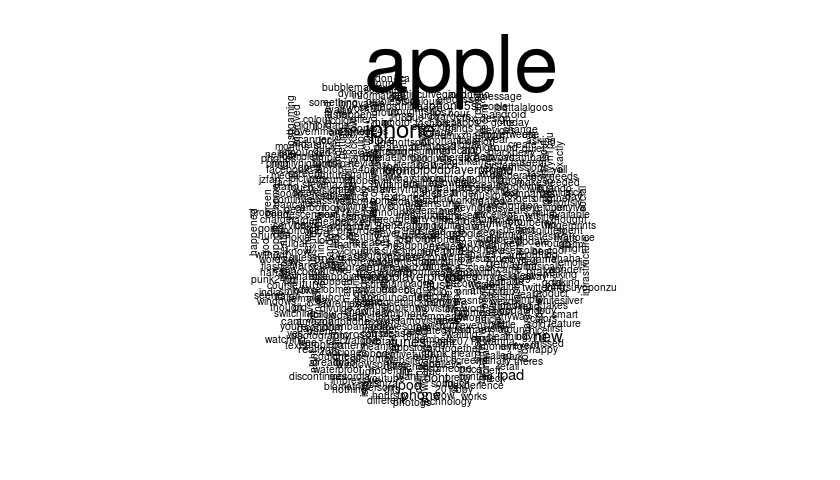

In [18]:
#colnames(allTweets)
#colSums(allTweets)
cloud = wordcloud(colnames(allTweets), colSums(allTweets))
#                  scale=c(2,0.25))

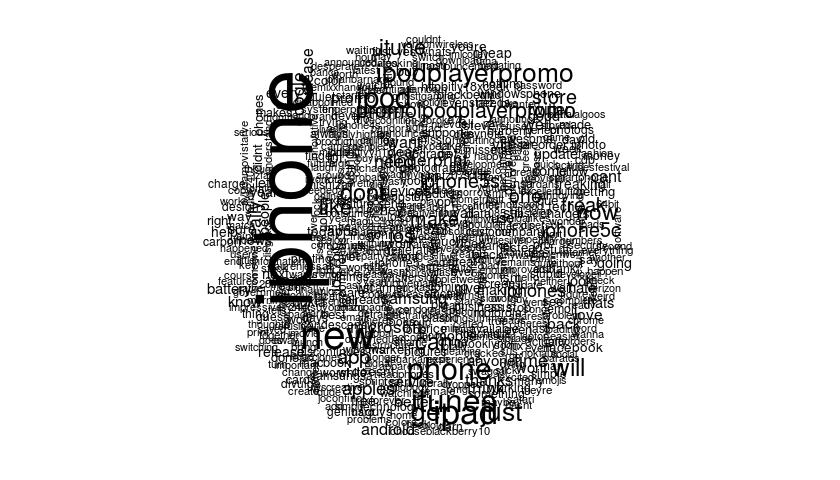

In [19]:
corpus = Corpus(VectorSource(tweets$Tweet))
corpus = tm_map(corpus, tolower)
corpus = tm_map(corpus, PlainTextDocument)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, c('apple', stopwords('english')))
dtm = DocumentTermMatrix(corpus)
allTweets = as.data.frame(as.matrix(dtm))
cloud = wordcloud(colnames(allTweets), colSums(allTweets))

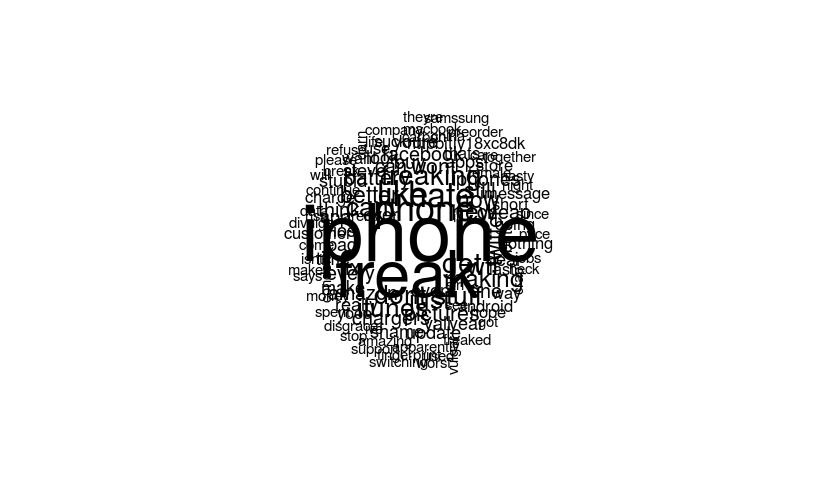

In [21]:
negativeTweets = subset(allTweets, tweets$Avg <= -1)
wordcloud(colnames(negativeTweets),
          colSums(negativeTweets),
          random.order=F)

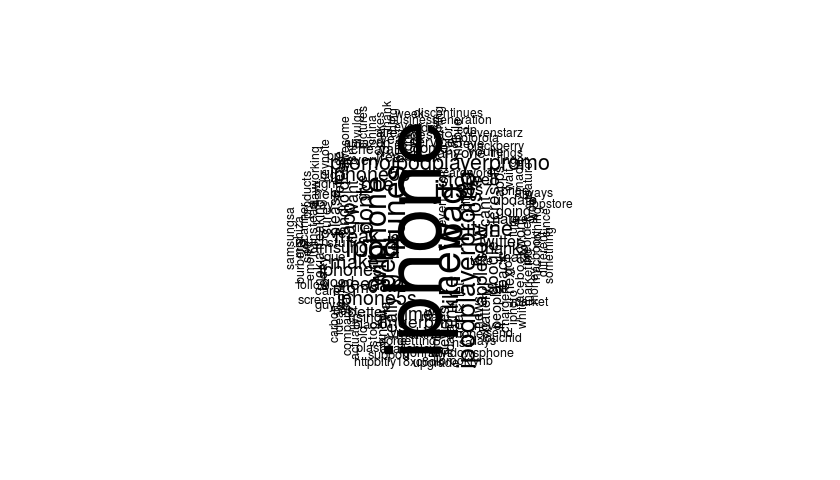

In [22]:
wordcloud(colnames(allTweets), colSums(allTweets),
          random.order=F, max.words=200, rot.per=0.5, random.color=T)

In [23]:
brewer.pal('Accent')

ERROR: Error in match(x, table, nomatch = 0L): argument "name" is missing, with no default


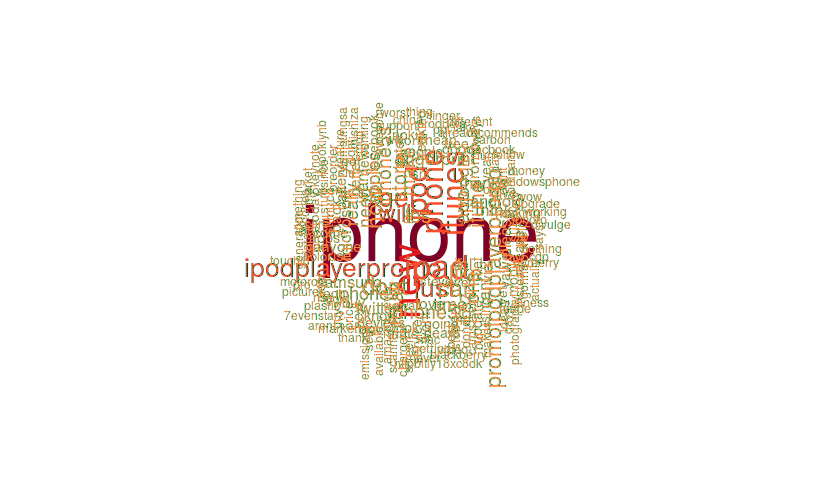

In [25]:
wordcloud(colnames(allTweets), colSums(allTweets),
          random.order=F, max.words=200,
          rot.per=0.5, colors=brewer.pal(9, 'YlOrRd')[-1:-4])

In [27]:
cs = read.csv('data/cs.tsv.xz', header=F, sep='\t',
              stringsAsFactors=F,
              col.names=c('date', 'author', 'message'))

In [28]:
head(cs)

,date,author,message
1,2016-06-04 02:00:28 +0300,Denis Lebedev <dlebedev@iponweb.net>,RT373211 Add passing to docker build UID and GID of user that runs vagrant up
2,2016-06-03 16:41:54 +0300,Oleg Lontsov <olontsov@iponweb.net>,Merged RT375341_per_userver_max_hours_metrics into default
3,2016-06-03 16:01:11 +0300,Maksim Ilinykh <milinykh@iponweb.net>,Updated change log
4,2016-06-03 15:40:22 +0300,Victor Fabrichenko <vfabrichenko@iponweb.net>,RT372368 review fix
5,2016-06-03 15:37:13 +0300,Victor Fabrichenko <vfabrichenko@iponweb.net>,RT372368 review fix
6,2016-06-03 12:49:11 +0300,Victor Fabrichenko <vfabrichenko@iponweb.net>,Merge RT372368 into default


In [54]:
cs = read.csv('data/cs.tsv.xz', header=F, sep='\t', stringsAsFactors=F,
              col.names=c('date', 'author', 'message'))
cs$author = gsub(' ?<.*@.*>', '', cs$author)
#cs = subset(cs, author=='Maksim Ilinykh')
cs = subset(cs, author=='Oleg Lontsov')
#cs = subset(cs, author=='Yuri Bochkarev')

getTerms <- function(text, morestopwords) {
    corpus = Corpus(VectorSource(text))
    corpus = tm_map(corpus, tolower)
    corpus = tm_map(corpus, PlainTextDocument)
    corpus = tm_map(corpus, removePunctuation)
    corpus = tm_map(corpus, removeWords, c(morestopwords, stopwords('english')))
    dtm = DocumentTermMatrix(corpus)
    terms = as.data.frame(as.matrix(dtm))
    terms
}

In [41]:
#wordcloud(colnames(allTweets), colSums(allTweets), random.order=F, max.words=200,
#          rot.per=0.5, colors=brewer.pal(9, 'YlOrRd')[-1:-4])
#cloud = wordcloud(colnames(csMessages), colSums(csMessages))

In [42]:
#table(cs$author)
auth = gsub(' ?<.*@.*>', '', cs$author)
#head(auth)
table(auth)

auth
         Alexandra Borisova              Andrey Kononov 
                         37                           7 
              Denis Lebedev            Denis Shpektorov 
                        120                         708 
              Ilya Martynov          Konstantin Trushin 
                        954                          52 
             Maksim Ilinykh             Mikhail Andreev 
                       1187                          75 
               Oleg Lontsov            Scream@Scream-PC 
                        340                           1 
              Sergei Anisov              Sergey Papilin 
                          1                         363 
         Victor Fabrichenko              Yuri Bochkarev 
                        147                         538 
                  aborisova henry@henry-virtual-machine 
                         13                           1 
          milinykh@barbados                vfabrichenko 
                          